In [240]:
# дані по кількості смертей в Канаді за 2016 рук, були взяті з інтернет ресурсів, не оформлених у вигляді готової бази даних
# за експерементальні дані я брав значення з інтернету, а за теоретичні, значення згідно з кривої нормального розподілу
# врахувоуючи середню продовжуваність життя в Канаді - 83 роки
import pandas as pd
work_data = pd.DataFrame(
{
    "Age" : ["<20", "20-29", "30-39", "40-49", "50-59", "60-69", "70-79", "80-89"],
    "Count_Exp" : [1361, 2890, 4028, 7445, 20647, 39340, 55309, 80778],
    "Count_Teor" : [2118, 4236, 6354, 14944, 25301, 39991, 50185, 68669]
    #"Count_Teor" : [3118, 6236, 9354, 10944, 28301, 45241, 60185, 62419] рядок для перевірки роботи вирівнювача груп 
})
work_data

,Age,Count_Exp,Count_Teor
0,<20,1361,2118
1,20-29,2890,4236
2,30-39,4028,6354
3,40-49,7445,14944
4,50-59,20647,25301
5,60-69,39340,39991
6,70-79,55309,50185
7,80-89,80778,68669


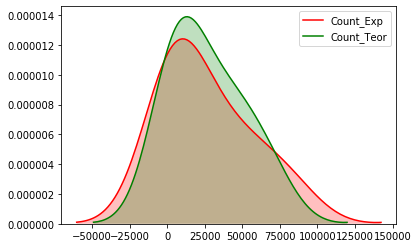

In [241]:
import seaborn as sns
%matplotlib inline

snsplot = sns.kdeplot(work_data["Count_Exp"], shade = True, color = 'r')
snsplot = sns.kdeplot(work_data["Count_Teor"], shade = True, color = 'g')
fig = snsplot.get_figure()

In [242]:
#функція виводить відсотковий розподіл по градаціям всередині груп
def percent():
    new_colum = [((work_data["Count_Exp"][i])/(work_data["Count_Exp"].sum())*100) for i in range(0, work_data.shape[0])]
    work_data.insert(4, "Percentile_Exp (%)", new_colum)
    new_colum = [((work_data["Count_Teor"][i])/(work_data["Count_Teor"].sum())*100) for i in range(0, work_data.shape[0])]
    work_data.insert(5, "Percentile_Teor (%)", new_colum)

#функція перевіряє чи рівні суми по групам
def dif_coef():
    if work_data["Count_Exp"].sum() != work_data["Count_Teor"].sum():
        return work_data["Count_Exp"].sum() / work_data["Count_Teor"].sum()
    else:
        return True

#якщо суми по групам не рівні, підганяє їх значення до еквівалентних за домогою коефіцієнту нерівності 
def equal(coefficient):
    if coefficient != True:
        for i in range(work_data.shape[0]):
            work_data["Count_Teor"][i] = work_data["Count_Teor"][i] * coefficient
        work_data["Count_Teor"][work_data.shape[0]-1] += work_data["Count_Exp"].sum() - work_data["Count_Teor"].sum()

#функція вираховує сам Хі-квадрат і записує в таблицю
def hi_part():
    new_colum = [((work_data["Count_Exp"][i] - work_data["Count_Teor"][i])**2) / (work_data["Count_Teor"][i]) for i in range(0, work_data.shape[0])]
    work_data.insert(3, "Xi^2 part", new_colum)

freedom_degree = work_data.shape[0] - 1
equal(dif_coef())
hi_part()
percent()
work_data

,Age,Count_Exp,Count_Teor,Xi^2 part,Percentile_Exp (%),Percentile_Teor (%)
0,<20,1361,2118,270.561379,0.642593,1.000009
1,20-29,2890,4236,427.694995,1.364508,2.000019
2,30-39,4028,6354,851.475606,1.901812,3.000028
3,40-49,7445,14944,3763.048782,3.515142,7.055780
4,50-59,20647,25301,856.081420,9.748440,11.945816
5,60-69,39340,39991,10.597409,18.574302,18.881670
6,70-79,55309,50185,523.171784,26.114033,23.694747
7,80-89,80778,68669,2135.284932,38.139170,32.421930


In [243]:
#підключаемо excel таблицю критичних значень Хі-квадрат
file = 'Critical_Table.xlsx'
xl = pd.ExcelFile(file)
control_data = xl.parse('Лист1')

#функція, що робить висновок чи є статистична розбіжність
def hi_square(significant_level):
    if significant_level == 0.001:
        colum = "Рівень значимості" #в підключеній таблиці потрібний стовпчик має таку назву
    elif significant_level == 0.05:
        colum = "Unnamed: 2" #в підключеній таблиці потрібний стовпчик має таку назву (для перевірки виводимо control_data за бажанням)
    if work_data["Xi^2 part"].sum() > control_data[colum][freedom_degree]:
        return False
    else:
        return True

if hi_square(0.001) == False:
    print('Статистична розбіжність між групами ПРИСУТНЯ')
else:
    print('Статистична розбіжність між групами ВІДСУТНЯ')

Статистична розбіжність між групами ПРИСУТНЯ
